In [1]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [2]:
sd_benchmarks = {}
for name in ["literature_sd","literature_det","random_sd","random_det"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    sd_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [3]:
tool_set = ["yes.seminator#def","yes.owl#best", "no.owl#best"]

For each benchmark, we list the cumulative numbers of states for each tool. `yes` in the name of tools means that the Spot simplifications were applied on the results of the tools (were not disabled for `seminator`). `best` means that we choose the best variant for Owl, `#def` is the default setting of Seminator 2. If you want to see numbers where Spot's simplifications were not run for Owl, or the numbers without the _best-for-Owl_ approach, set tool_set to `None`. If you do, the `#a` stands for `ltl2ldgba -a` and analogously for `#s`.

In [4]:
gather_cumulative(sd_benchmarks, tool_set=tool_set)

,literature_sd,literature_det,random_sd,random_det
tool,,,,
no.owl#best,306,786,3497,2809
yes.owl#best,272,706,3005,2496
yes.seminator#def,207,580,2562,2352


### Minimal automata

The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [5]:
gather_mins(sd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The `#a` variant of Owl reached the 30s timeout in one case for random formulae. Otherwise, most of the execution times were below 1s for all tools.

In [6]:
for name, b in sd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max())

literature_sd


,timeout,parse error,incorrect,crash,no output
no.owl#a,1,0,0,0,0
yes.owl#a,1,0,0,0,0


tool
min(count)             0.027269
no.owl#a              30.000400
no.owl#best            0.808722
no.owl#s               0.808722
no.seminator#def       0.047497
no.seminator#sba       0.044537
no.seminator#tba       0.047334
no.seminator#tgba      0.045863
no.seminator-1-1       0.050620
no.seminator-1-2       0.046512
yes.owl#a             30.000500
yes.owl#best           1.635690
yes.owl#s              1.635690
yes.seminator#def      0.062898
yes.seminator#sba      0.058190
yes.seminator#tba      0.067403
yes.seminator#tgba     0.073934
yes.seminator-1-1      0.099307
yes.seminator-1-2      0.094695
dtype: float64

literature_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.071069
no.owl#a              6.555810
no.owl#best           0.129774
no.owl#s              0.577179
no.seminator#def      0.046867
no.seminator#sba      0.054453
no.seminator#tba      0.040170
no.seminator#tgba     0.049588
no.seminator-1-1      0.048507
no.seminator-1-2      0.049013
yes.owl#a             8.278400
yes.owl#best          2.044730
yes.owl#s             2.044730
yes.seminator#def     0.071069
yes.seminator#sba     0.051867
yes.seminator#tba     0.055161
yes.seminator#tgba    0.057353
yes.seminator-1-1     0.083654
yes.seminator-1-2     0.076610
dtype: float64

random_sd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.123600
no.owl#a              0.927842
no.owl#best           0.618125
no.owl#s              0.618125
no.seminator#def      0.267336
no.seminator#sba      0.221721
no.seminator#tba      0.259842
no.seminator#tgba     0.270551
no.seminator-1-1      0.248314
no.seminator-1-2      0.250969
yes.owl#a             0.860366
yes.owl#best          0.462847
yes.owl#s             0.510254
yes.seminator#def     0.238686
yes.seminator#sba     0.253137
yes.seminator#tba     0.252744
yes.seminator#tgba    0.219798
yes.seminator-1-1     0.265253
yes.seminator-1-2     0.241046
dtype: float64

random_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.069440
no.owl#a              0.221144
no.owl#best           0.072987
no.owl#s              0.075753
no.seminator#def      0.175544
no.seminator#sba      0.202978
no.seminator#tba      0.177449
no.seminator#tgba     0.168710
no.seminator-1-1      0.165028
no.seminator-1-2      0.198850
yes.owl#a             0.258788
yes.owl#best          0.162300
yes.owl#s             0.182623
yes.seminator#def     0.175926
yes.seminator#sba     0.217669
yes.seminator#tba     0.173406
yes.seminator#tgba    0.197261
yes.seminator-1-1     0.197207
yes.seminator-1-2     0.215426
dtype: float64

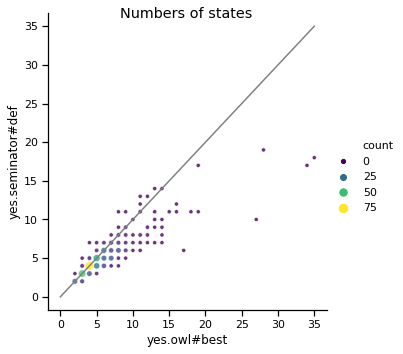

In [7]:
b = sd_benchmarks["random_sd"]
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

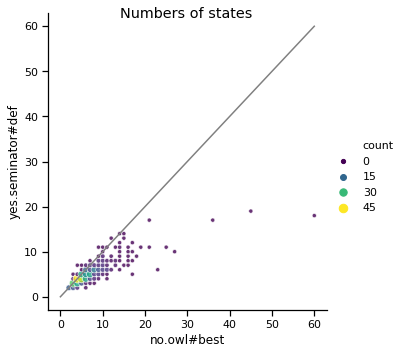

In [8]:
b = sd_benchmarks["random_sd"]
b.seaborn_scatter_plot("no.owl#best","yes.seminator#def", include_equal=True)

### Cross-comparison
The cross-comparison for a benchmark shows, in a cell (`row`,`column`) in how many cases the tool in `row` produces automaton that is better thatn the one produced by `column`. The last columns (`V`) summs the numbers across rows, while the green highlighting fill a space that is proportional to how well the tool in `row` competed agains `column` (proportional across columns).

In [9]:
for n, b in sd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,40,72
yes.owl#best,2,nan,38,40
no.owl#best,2,0,nan,2


literature_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,66,98
yes.owl#best,0,nan,66,66
no.owl#best,0,0,nan,0


random_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,250,402,652
yes.owl#best,135,nan,423,558
no.owl#best,67,0,nan,67


random_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,53,202,255
yes.owl#best,4,nan,200,204
no.owl#best,0,0,nan,0


# Merged results
We now merge the random results from the 2 categories into 1

In [10]:
!cp data/random_det.csv data/random_sd_merged.csv
!tail -n +2 data/random_sd.csv >> data/random_sd_merged.csv
!wc data/random_sd_merged.csv
!cp data/literature_det.csv data/literature_sd_merged.csv
!tail -n +2 data/literature_sd.csv >> data/literature_sd_merged.csv
!wc data/literature_sd_merged.csv

  16001 1220035 7484470 data/random_sd_merged.csv
   3217  310405 1939677 data/literature_sd_merged.csv


In [11]:
m_benchmarks = {}
for name in ["literature_sd_merged","random_sd_merged"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    m_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [12]:
gather_cumulative(m_benchmarks, tool_set=tool_set)

,literature_sd_merged,random_sd_merged
tool,,
no.owl#best,1092,6306
yes.owl#best,978,5501
yes.seminator#def,787,4914


In [13]:
gather_mins(m_benchmarks, tool_set=tool_set)

In [14]:
b = m_benchmarks["random_sd_merged"]

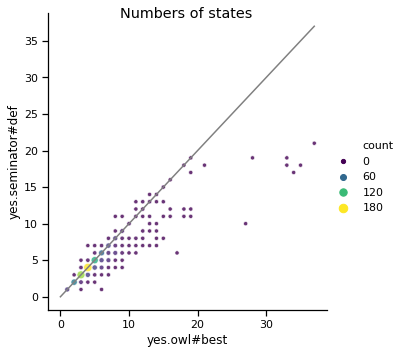

In [15]:
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

In [16]:
b.cross_compare(tool_set)

,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,303,604,907
yes.owl#best,139,nan,623,762
no.owl#best,67,0,nan,67
